## Description :-

### Title: adult.csv

#### Sources :
- Original owner of dataset- US Census Bureau
- Donor of dataset-Ronny Kohavi and Barry Becker
- Date received - 05/19/96 

#### Relevant Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### Number of Columns:
- 6 continuous, 9 nominal attributes.

#### . Attribute Information:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income:>50K, <=50K

#### Missing Values: 
7% rows have missing values.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
missing=['?']
data=pd.read_csv('adult1.csv',na_values=missing)
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
data.shape

(48842, 15)

In [13]:
data.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Handling Missing Values

In [14]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [30]:
data.dropna(axis=0,how='any',inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [31]:
data.reset_index(drop=True,inplace=True) 
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [32]:
data.drop(labels="fnlwgt",axis=1,inplace=True)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# # Percentage of rows deleted

In [17]:
var=((len(data)-len(data.dropna(axis=0,how='any')))/len(data))*100
print("The percentage of row removed are",var)

The percentage of row removed are 7.411653904426519


# Univariate Analysis

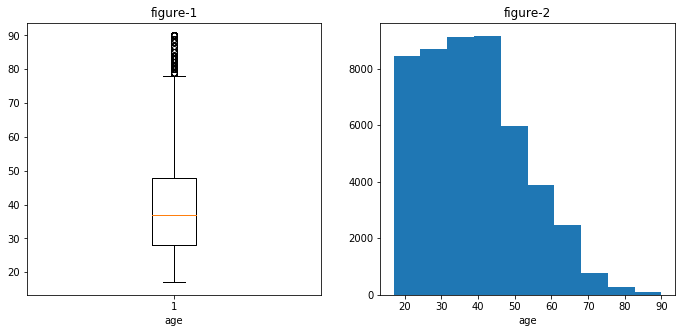

outliers in the dataset are : 
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [44]:
# plotting age column.

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.boxplot(data.age)         
plt.xlabel("age")
plt.title("figure-1")

plt.subplot(1,2,2)
plt.hist(data.age) 
plt.xlabel("age")
plt.title("figure-2")

plt.subplots_adjust(left=1,right=2.8)
plt.show()

# Finding the outlier
l=list(data['age'].astype('int'))
l.sort()
q1,q3=np.percentile(l,[25,75])
iqr=q3-q1
# print(iqr)
l_bound=q1-(1.5*iqr)
u_bound=q3+(1.5*iqr)
# print(l_bound,u_bound)
print("outliers in the dataset are : ")
l1=[]
for i in l:
    if i not in range(int(l_bound),int(u_bound)+1):
        l1.append(i)
val=list(set(l1))
print(val)

# Observation
1. It is observed that outliers are present in the age data.
2. Outliers ranges from 79 to 90 as calculated above.
3. A majority of people are present in the age group of 20-50.
4. Also very least are present in the age group of 70-90.

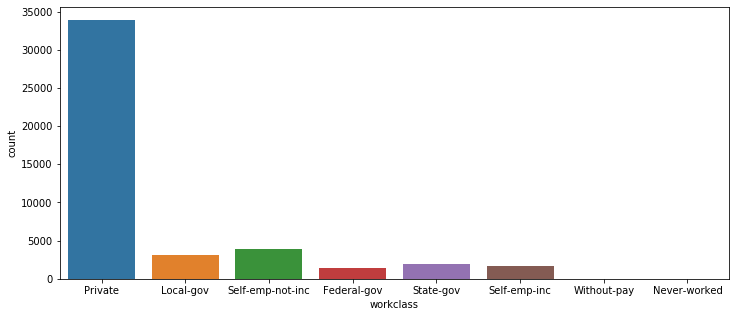

In [20]:
# Plotting countplot.

plt.figure(figsize=(12,5))
sns.countplot(x="workclass",data=data)
plt.show()

# Observation
There are no people who are without-pay or who had never worked which means that there is no unemployment among the citizens. Every citizen is endulged in one or the other sector.

# Understanding frequency distribution
1. It is observed that more than 75% of the people are working under the private sector.
2. Also in every sector there are less 5000 people.
3. Including the corporate and incorporate secotr almost 6000 people are self employed which means they have started there own business.
4. Rest of the people are in the government sector.

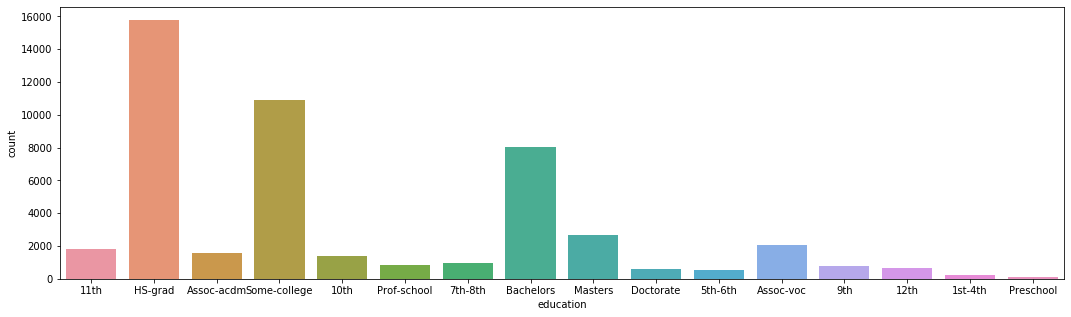

In [21]:
#Plotting Education column.

plt.figure(figsize=(18,5))
sns.countplot(x="education",data=data)
plt.show()

# Observation
Seeing the educational qualification of some of the people it is observed that there is high Illiteracy rate in many country.This is because people who have'nt graduated school yet, are earning money.

# Understanding frequency distribution
1. It is seen that only people of only 5 sectors have are graduated i.e., the Some-college, Bachleors, Masters, School Professor and Doctorate. Rest all the people of differnt sectors are employed without the graduation.
2. With the majority of alomost 16000 people are employed that are only high school graduate.
3. Also with the least no of less than 500 people from the pre-School are also being employed. 

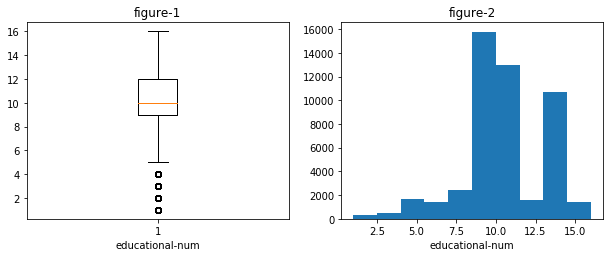

outliers in the dataset are : 
[1, 2, 3]


In [47]:
# Plotting Educational-num column.

plt.figure(figsize=(4,6))   
plt.subplot(2,2,2)
plt.hist(data['educational-num'])
plt.xlabel("educational-num")
plt.title("figure-2")

plt.subplot(2,2,1)
plt.boxplot(data['educational-num'])
plt.xlabel("educational-num")
plt.title("figure-1")

plt.subplots_adjust(left=3,right=5,top=5,bottom=4)
plt.show()


# Finding the outlier
l=list(data['educational-num'].astype('int'))
l.sort()
q1,q3=np.percentile(l,[25,75])
iqr=q3-q1
# print(iqr)
l_bound=q1-(1.5*iqr)
u_bound=q3+(1.5*iqr)
# print(l_bound,u_bound)
print("outliers in the dataset are : ")
l1=[]
for i in l:
    if i not in range(int(l_bound),int(u_bound)+1):
        l1.append(i)
val=list(set(l1))
print(val)

# Observation
1. In figure-1 we can see that the educational-num contain outliers. And it ranges from 1-3 as calculated above.
2. Also from figure-2 it is seen that most of the data lies between 9-13.
3. Median od the data is 10.

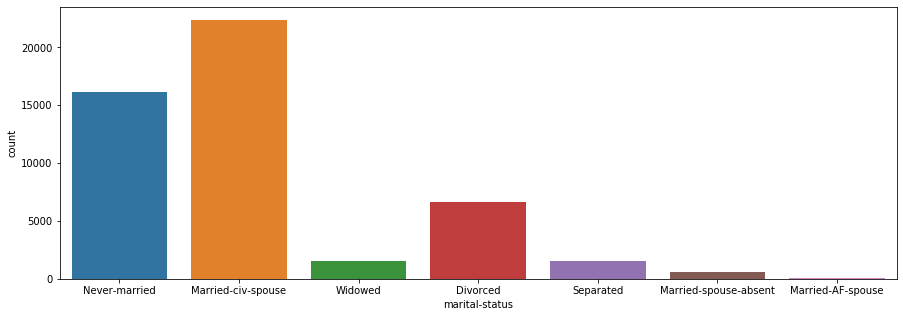

In [24]:
# Plotting Marital-status column.

plt.figure(figsize=(15,5))
sns.countplot(x="marital-status",data=data)
plt.show()

# Observation
Seeing the dataset it observed that the ratio between the married and the divorced or separated spouse is approx 3:1, which is a very bad ratio. As more and more couples from their married life are frustated and are separating.

# Understanding frequency distribution
1. It is seen that more than 20000 people are married which comes out to be the highest Number.
2. Also more than 15000 people are unmarried.
3. army forced spouse takes the least position in the dataset with less than 1000 people.

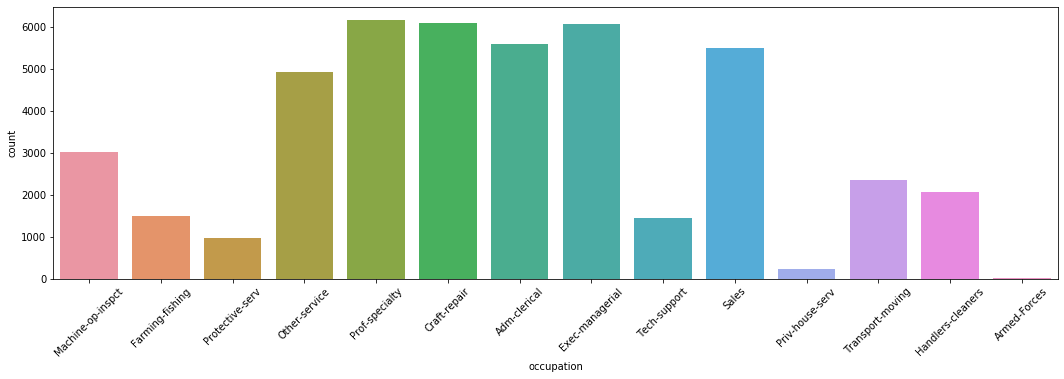

In [25]:
# Plotting Occupation column.

plt.figure(figsize=(18,5))
sns.countplot(x="occupation",data=data)
plt.xticks(rotation=45)
plt.show()

# Observation


# Understanding frequency distribution
1. 

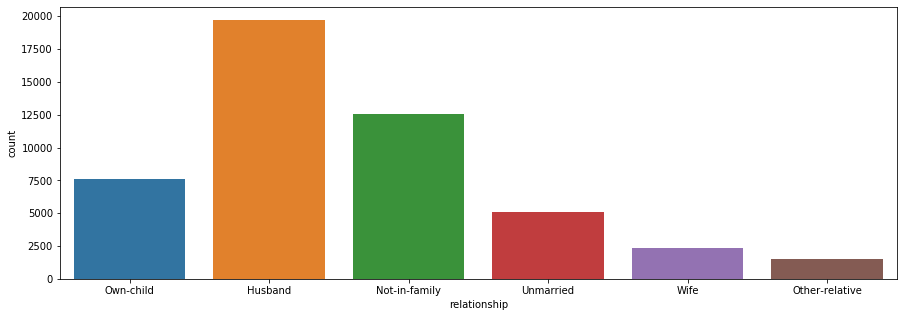

In [26]:
# Plotting Relationship column.

plt.figure(figsize=(15,5))
sns.countplot(x="relationship",data=data)
plt.show()

# Observation 
It is seen that the percentage of the males are very large as compared to the females in the dataset. This is because the no of only husbands here is nearly 20000.

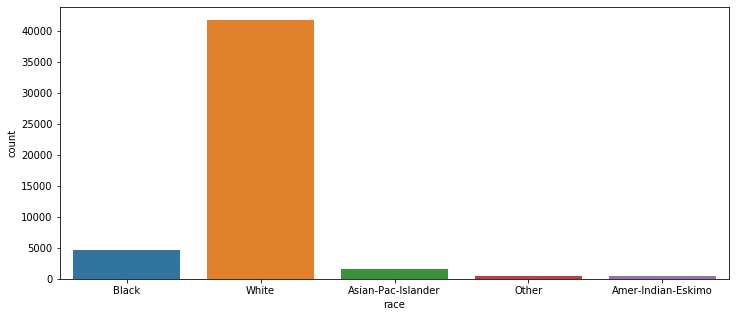

In [27]:
# Plotting Race column.

plt.figure(figsize=(12,5))
sns.countplot(x="race",data=data)
plt.show()

# Observation
It is observed that dataset contains most of the people from the foreign countries as the number of white people is more than 40000 out of 48890 peoples.

# understanding frequency distribution
1. This dataset contains more than 85% people of the foreign countries.
2. The number of black people are almost 5000.
3. Rest of the people are from the Amer-indiam-Eskino , Asian-Pac-Islander and others.

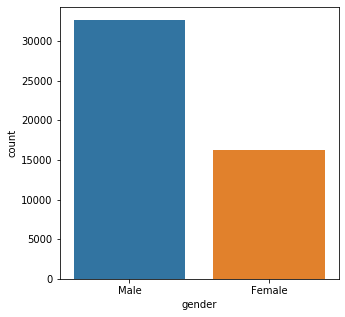

In [28]:
# Plotting Gender column.

plt.figure(figsize=(5,5))
sns.countplot(x="gender",data=data)
plt.show()

# Observation
It is observed that the count of the males are more than double than that of the females.

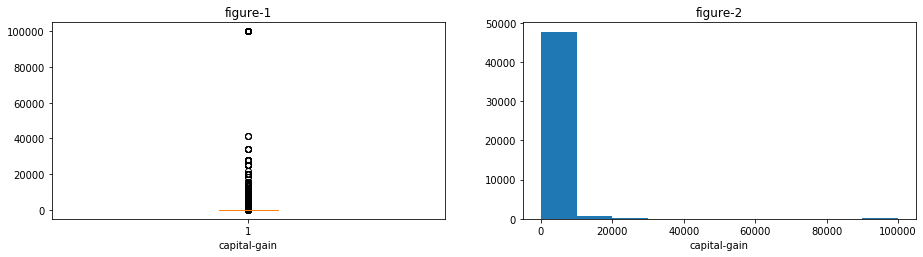

outliers in the dataset are : 
[2050, 4101, 7688, 14344, 2062, 2580, 22040, 1055, 3103, 25124, 2597, 4650, 18481, 2105, 5178, 1086, 3137, 6723, 2635, 4687, 594, 20051, 1111, 5721, 3674, 2653, 7262, 1639, 6767, 114, 2174, 1151, 2176, 7298, 25236, 1173, 2202, 99999, 9386, 15020, 15024, 4787, 2228, 27828, 6849, 1731, 3781, 3273, 6360, 7896, 3818, 13550, 1264, 2290, 3325, 4865, 14084, 1797, 7430, 2829, 6418, 7443, 10520, 2329, 4386, 1831, 2346, 7978, 3887, 34095, 2354, 1848, 4416, 4931, 3908, 2885, 4934, 10566, 5455, 2387, 3411, 3418, 2907, 9562, 41310, 6497, 3942, 2407, 3432, 10605, 2414, 6514, 2936, 3456, 1409, 3464, 3471, 1424, 401, 914, 2961, 2964, 5013, 4508, 11678, 2463, 2977, 8614, 1455, 2993, 5556, 1471, 5060, 6097, 6612, 15831, 2009, 991, 4064, 1506, 2538, 2036]


In [50]:
# Plotting Capital-gain column.

plt.figure(figsize=(6,6))
plt.subplot(2,2,2)
plt.hist(data['capital-gain'])
plt.xlabel("capital-gain")
plt.title("figure-2")

plt.subplot(2,2,1)
plt.boxplot(data['capital-gain'])
plt.xlabel("capital-gain")
plt.title("figure-1")

plt.subplots_adjust(left=3,right=5,top=5,bottom=4)
plt.show()

# Finding the outlier
l=list(data['capital-gain'].astype('int'))
l.sort()
q1,q3=np.percentile(l,[25,75])
iqr=q3-q1
# print(iqr)
l_bound=q1-(1.5*iqr)
u_bound=q3+(1.5*iqr)
# print(l_bound,u_bound)
print("outliers in the dataset are : ")
l1=[]
for i in l:
    if i not in range(int(l_bound),int(u_bound)+1):
        l1.append(i)
val=list(set(l1))
print(val)

# Observation
1. It is observed that the for most of the people there is no gain in the capital. Only some of the people having a good job had capital gain.
2. Therefore it has too many outliers as calculated above.
3. Mode of the data set is 0.

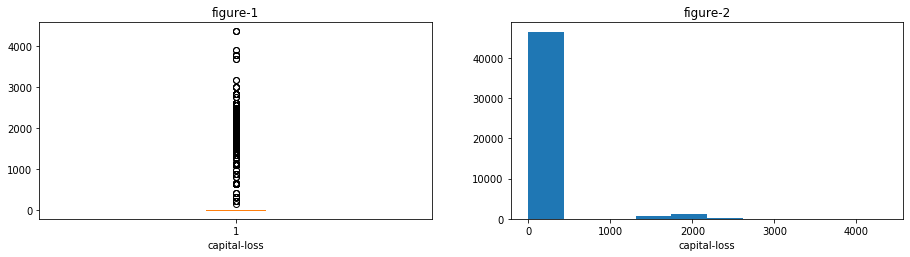

outliers in the dataset are : 
[1539, 2051, 2057, 1564, 2080, 1573, 1579, 2603, 1590, 1594, 1602, 1092, 1617, 2129, 1628, 3683, 2149, 3175, 1648, 625, 1138, 1651, 2163, 2174, 2179, 1668, 1669, 1672, 653, 2201, 155, 2205, 2206, 1719, 2231, 1721, 3770, 1726, 2238, 2754, 2246, 1735, 1740, 1741, 2258, 213, 1755, 2267, 1762, 1258, 2282, 4356, 2824, 1816, 1825, 2339, 810, 2352, 1844, 1848, 1340, 3900, 323, 2377, 1870, 1876, 2392, 1887, 1380, 1902, 2415, 880, 1911, 1408, 1411, 2444, 1421, 1429, 1944, 2457, 2465, 419, 2467, 2472, 1974, 1977, 2489, 1980, 3004, 1485, 974, 2001, 2002, 1504, 1510, 2547, 2042, 2559]


In [51]:
# Plotting Capital-loss column.

plt.figure(figsize=(6,6))
plt.subplot(2,2,2)
plt.hist(data['capital-loss'])
plt.xlabel("capital-loss")
plt.title("figure-2")

plt.subplot(2,2,1)
plt.boxplot(data['capital-loss'])
plt.xlabel("capital-loss")
plt.title("figure-1")

plt.subplots_adjust(left=3,right=5,top=5,bottom=4)
plt.show()

# Finding the outlier
l=list(data['capital-loss'].astype('int'))
l.sort()
q1,q3=np.percentile(l,[25,75])
iqr=q3-q1
# print(iqr)
l_bound=q1-(1.5*iqr)
u_bound=q3+(1.5*iqr)
# print(l_bound,u_bound)
print("outliers in the dataset are : ")
l1=[]
for i in l:
    if i not in range(int(l_bound),int(u_bound)+1):
        l1.append(i)
val=list(set(l1))
print(val)

# Observation
1. Also most of the people had no capital loss, which means there are very less no of the business man present in the dataset. AS for both the capital gain and loss there are very less people.
2. Therefore there are too many outliers.
3. This also has mode 0.

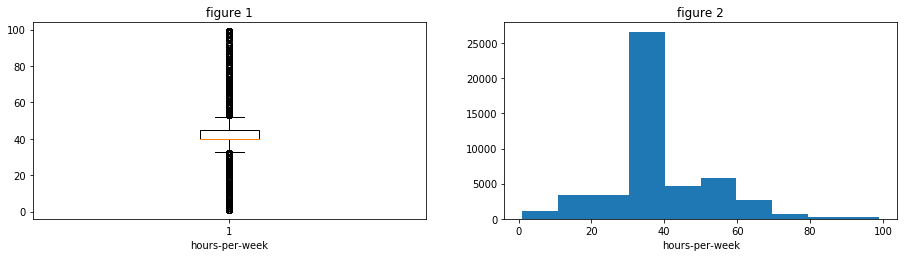

outliers in the dataset are : 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99]


In [52]:
# Plotting Hours-per-week Column.

plt.figure(figsize=(6,6))
plt.subplot(2,2,2)
plt.hist(data['hours-per-week'])
plt.title("figure 2")
plt.xlabel("hours-per-week")

plt.subplot(2,2,1)
plt.boxplot(data['hours-per-week'])
plt.title("figure 1")
plt.xlabel("hours-per-week")

plt.subplots_adjust(left=3,right=5,top=5,bottom=4)
plt.show()

# Finding the outlier
l=list(data['hours-per-week'].astype('int'))
l.sort()
q1,q3=np.percentile(l,[25,75])
iqr=q3-q1
# print(iqr)
l_bound=q1-(1.5*iqr)
u_bound=q3+(1.5*iqr)
# print(l_bound,u_bound)
print("outliers in the dataset are : ")
l1=[]
for i in l:
    if i not in range(int(l_bound),int(u_bound)+1):
        l1.append(i)
val=list(set(l1))
print(val)

# Observation
1. Here most of the value is present between 35-45.
2. It also has too many outliers as calculated above.
3. Mode of the data is 40.

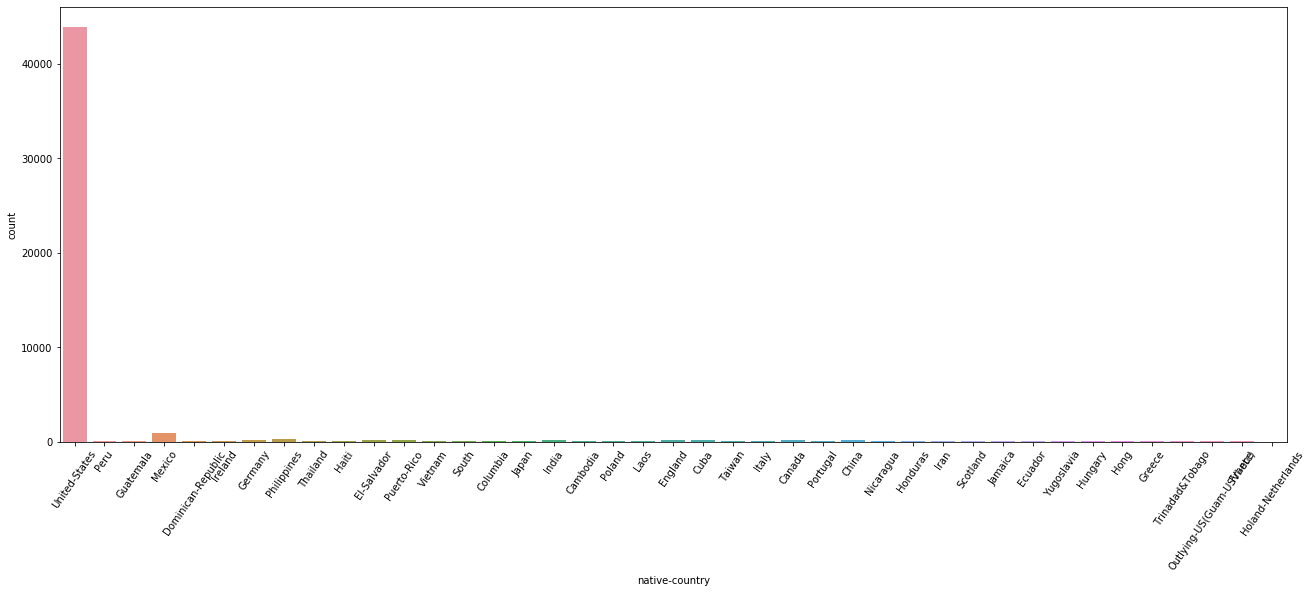

In [35]:
# Plotting Native-country column.


plt.figure(figsize=(22,8))
sns.countplot(x="native-country",data=data)
plt.xticks(rotation=55)
plt.show()

# Observation
It is observed that more than 90% of the people belong to United States.
Also the Count of the other countries is given below.

In [36]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

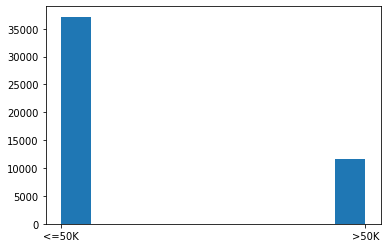

In [37]:
# Plotting Income column.


plt.hist(data["income"])
plt.show()


# # PDF of Numerical Columns

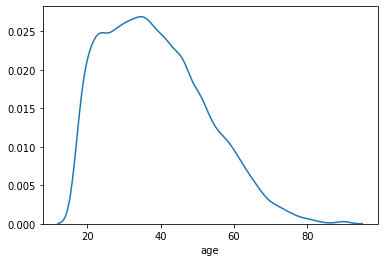

In [38]:
sns.distplot(data["age"],hist=False)
plt.show()

# Observation
1. In the above graph, the y-axis represents the probability distribution of the age column. It means the percentage of the people of that age are present in the dataset.
2. for example the age 40 reaches the peak at the graph which is almost equal to 3 i.e., 3% of the people in the dataset are of age 40.


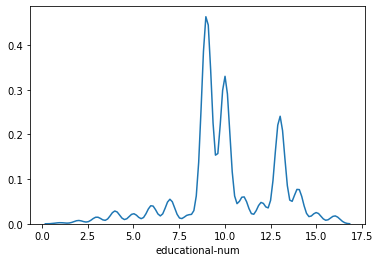

In [39]:
sns.distplot(data["educational-num"],hist=False)
plt.show()

# Observation
According to the PDF alomst 50% of the people have educational no 9.
And almost 30% of the people have eductional no 10.
Similiarly 25% of people have educational no 13.

# Note
The PDF of the columns capital-gain and capital-loss cannot be drawn because they have a huge density of zeros. Therefore thier probability comes out to be zero only. 

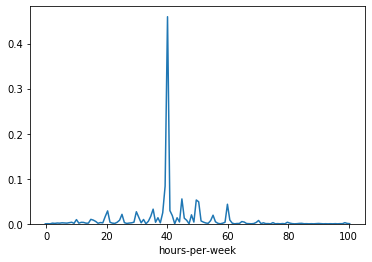

In [40]:
sns.distplot(data["hours-per-week"],hist=False)
plt.show()

# Observation 
It is clearly seen that 50% og the people work almost 40 hours a week.
Rest of the 50% of the people work less than 10 hours a week

# Bivariate Analysis


## For numerical columns

[]

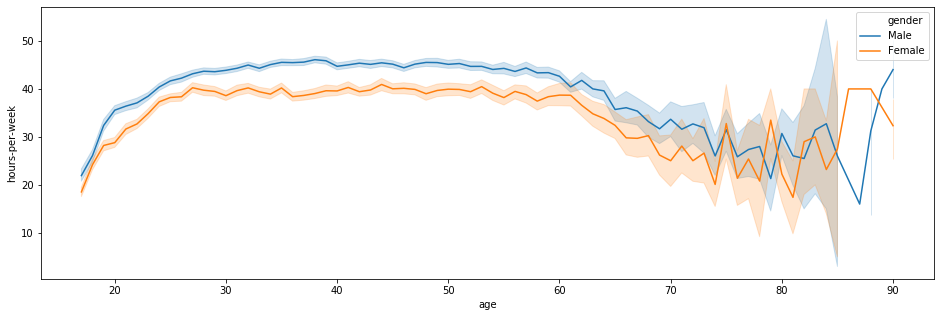

In [9]:
# Between age and hours-per-week. 

plt.figure(figsize=(16, 5))
sns.lineplot(x = 'age', y = 'hours-per-week', hue = 'gender', data = data)
plt.plot()


# Observation
1. It is observed that with the increase in the age the capacity to work reduces. As between 20-60 age hors-per-week is around 40-45 hours while from 60-90 age the hours-per-week capacity reduces to 20-30 hours.
2. Also it is seen that the capacity of males is more than that of the female.
3. hours-per-week capacity of the people under the age of 20 is reduced to 20-25 hours.



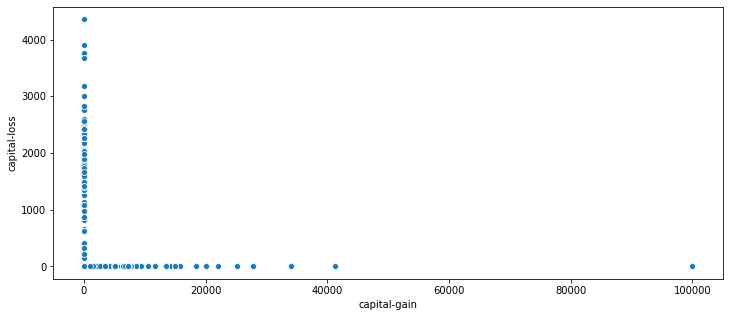

In [11]:
# Between Capital Gain and Capital Loss
plt.figure(figsize=(12,5))
sns.scatterplot(x = data['capital-gain'], y = data['capital-loss'])
plt.show()

# Observation
1. Both capital gain and loss can be zero.
2. If the capital-gain is high than the capital-loss is zero and vice-versa.
3. Therefore it is seen that either the capital-gain can be high or capital-loss can be high both cannot be high for the same person

In [12]:
data.groupby(['income']).mean()


,age,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,36.749427,9.630770,149.023402,54.032428,39.372023
>50K,44.006067,11.598501,3991.791667,193.487063,45.690489


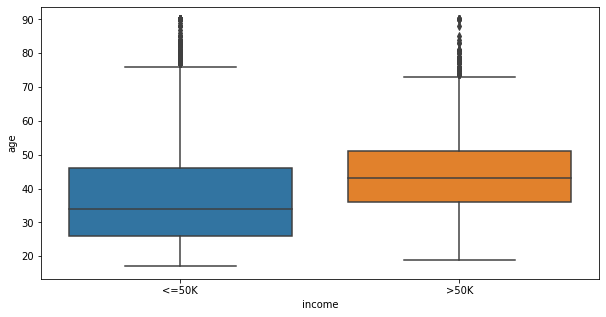

In [13]:
# Relationship between age and income)
plt.figure(figsize=(10,5)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

# Observation
1. It is observed that people with the age between 25-45 had mostly income <=50k.
2. Similiarly people with the age between 40-50 had mostly income >50k.

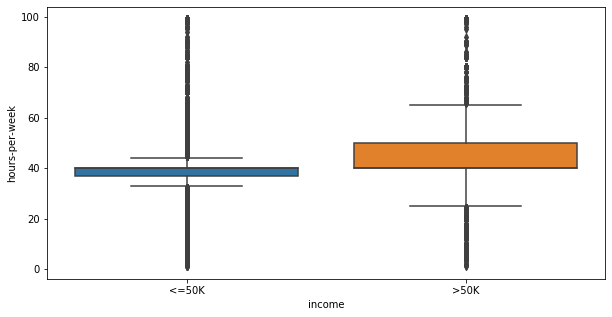

In [14]:
# Hours per Week and Income

plt.figure(figsize=(10,5)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

# Observation
1. It is observed that with incresing the number of hour per week the salary increases.
2. As mostly people working between 45-55 hours per week had salary >50k.
3. Similiarly people working between 30-40 hours per week has salary <=50k.

# For categorical and Numerical columns


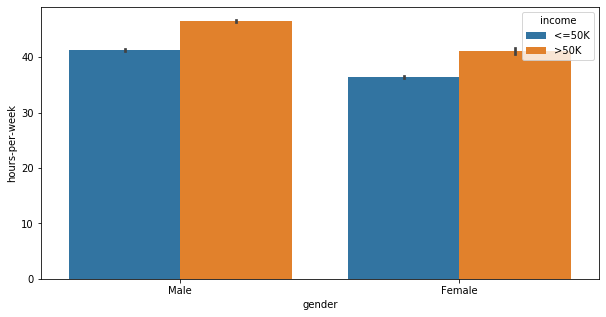

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y="hours-per-week", hue="income", data=data)
plt.show()

# Observation
1. The average salary of males are more than females.
2. Also the Working hours of males are more than the females.

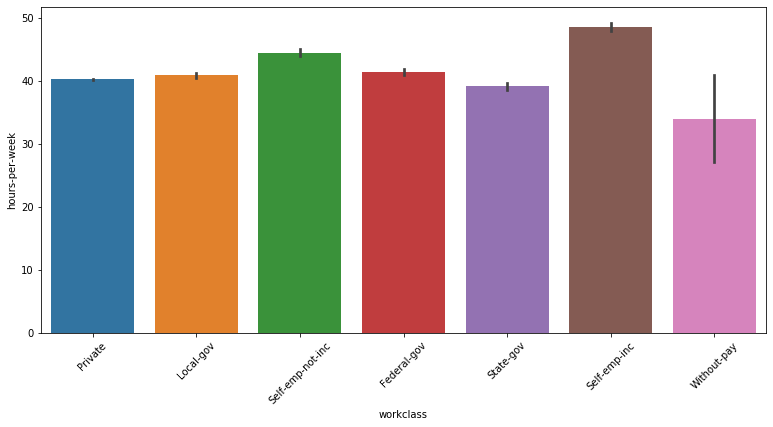

In [19]:
plt.figure(figsize=(13,6))                      #1
plt.xticks(rotation=45)                                           
sns.barplot(data=data,x="workclass",y="hours-per-week")
plt.show()

# Observation
It is seen that people working as self-emp-inc works for most number of hours per week.

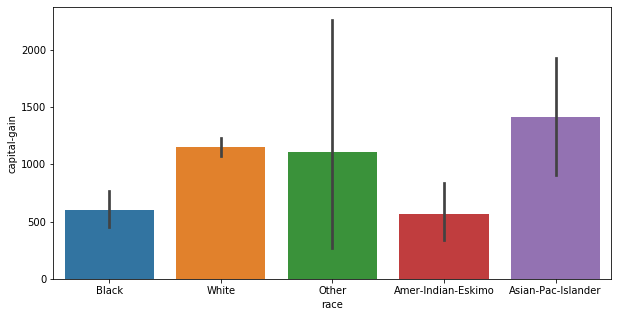

In [24]:
plt.figure(figsize=(10,5))                      #1
sns.barplot(data=data,x="race",y="capital-gain")
plt.show()

# Observation
It is observed that asian pac islander has the most capital gain

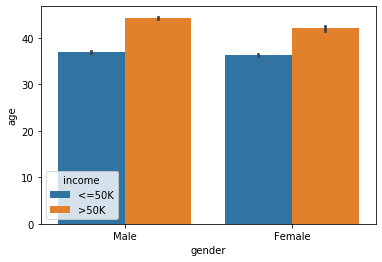

In [27]:
sns.barplot(data=data,x="gender",y="age",hue="income")
plt.show()

# Observation 
1. It is seen that the average age of the male is more than the female.
2. Also the average income of the males are more than the females.

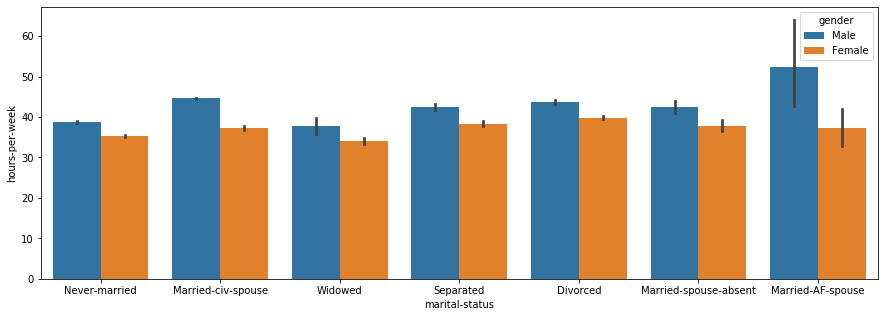

In [32]:
plt.figure(figsize=(15,5))                  
sns.barplot(data=data,x="marital-status",y="hours-per-week",hue="gender")
plt.show()

# Observation
1. It is seen that males work more number of hours than female.
2. Also the males Air-Forced type work for the most No of hours.

[]

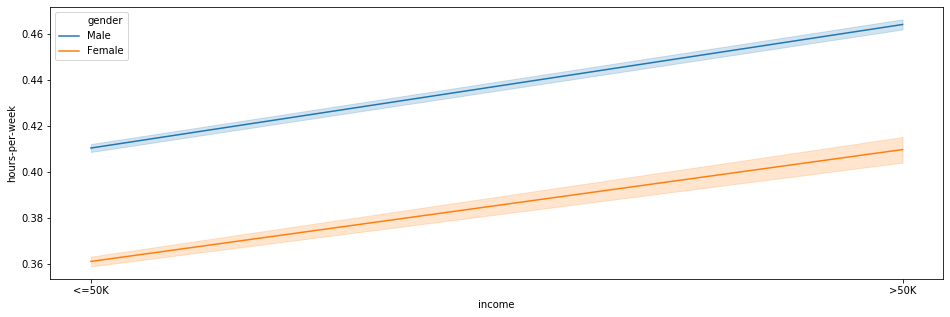

In [19]:
# Between income and hours per week


plt.figure(figsize=(16, 5))
sns.lineplot(x = 'income', y = 'hours-per-week', hue = 'gender', data = data)
plt.plot()

# Observation
1. It is observed that as the number of hours per week increases, The income of the indiviual also increases. Which means that income is directly proportional to the hard work of individual.
2. Also the there is difference in the capacity between males and female is seen. As the working hours per week for males is more than that of the female.

[]

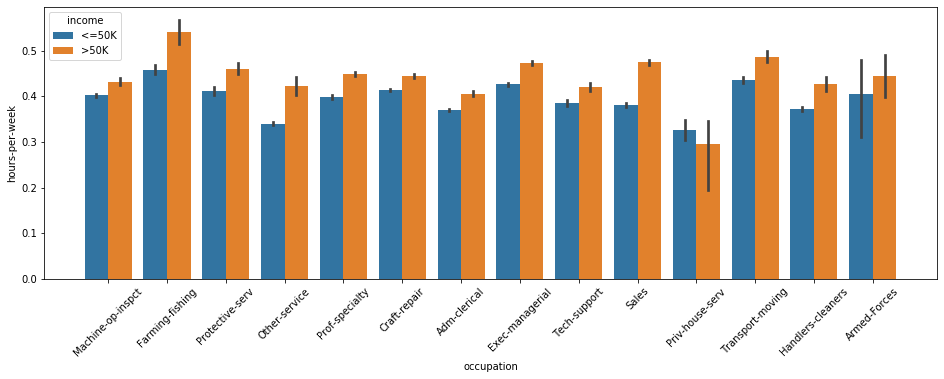

In [23]:
# Between Occupation, hours per week and income 

plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
sns.barplot(x = 'occupation', y = 'hours-per-week', hue = 'income', data = data)
plt.plot()

# Observation
1. It is seen that individual working for 40+ hours have mostly income level >50k.
2. Also individual from Farming and fishing sectors works for most number of hours.
3. There are many outliers present in the armed forces sector.

# Conclusion Of EDA:
1. The data has a overall of 7% of missing values. Also there is a pattern seen in the missing values That both the Workclass and Occupation Columns has the missing value at the same time, Also the age of the person having missing values is mostly below 20 years or above 60 years. Which means that either the persons workclass has not been decided or he/she may have retired from his occupation.
2. Column fnlwg has no value.
3. Individual having the income >50k have mostly working hours per week atleast greater than 40, which implies that they are more hard working.
4. The mode of the working hoursper week is 40.
5. Most of the people have no capital-gain and capital-loss only a few people are having capital gain and loss, which is possible that they belong to the business class.


#  Performing Feature Transformation


In [33]:
from sklearn.preprocessing import MinMaxScaler


Importing MinMaxScaler from sklearn. MinMaxScalar transform features by scaling each feature to a given range.


## Categorical Feature Transformation

In [34]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [35]:
nf=pd.get_dummies(data,columns=["workclass","education","marital-status","occupation","relationship","race","gender","native-country","income"],drop_first=True)


### With this we have converted all categorical columns into dummy variable

In [36]:
nf.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Numerical Feature Transformation

In [37]:
features=data.loc[:,["age","educational-num","capital-gain","capital-loss","hours-per-week"]]

In [38]:
features.head(3)

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40


In [39]:
scaling=MinMaxScaler()

In [40]:
scaling.fit_transform(features)

array([[0.10958904, 0.4       , 0.        , 0.        , 0.39795918],
       [0.28767123, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.73333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.56164384, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.06849315, 0.53333333, 0.        , 0.        , 0.19387755],
       [0.47945205, 0.53333333, 0.1502415 , 0.        , 0.39795918]])

### Here we have done feature transformation of numerical column in the range(0,1) with the help of MINMAXSCALER

